In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Ìï¥Ïö¥ÎåÄÍµ¨"
region_code = "18"
target_date = "2021-01-07"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2021_1q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2021-01-07   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425   Ìï¥Ïö¥ÎåÄÍµ¨  14850   Ìï¥Ïö¥ÎåÄÍµ¨   
1   2021-01-07     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300   Ìï¥Ïö¥ÎåÄÍµ¨   7250   Ìï¥Ïö¥ÎåÄÍµ¨   
2   2021-01-07     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)  14444   Ìï¥Ïö¥ÎåÄÍµ¨  18181   Ìï¥Ïö¥ÎåÄÍµ¨   
3   2021-01-07    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4761   Ìï¥Ïö¥ÎåÄÍµ¨   5708   Ìï¥Ïö¥ÎåÄÍµ¨   
4   2021-01-07     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2980   Ìï¥Ïö¥ÎåÄÍµ¨   3180   Ìï¥Ïö¥ÎåÄÍµ¨   
5   2021-01-07    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5300   Ìï¥Ïö¥ÎåÄÍµ¨   8112   Ìï¥Ïö¥ÎåÄÍµ¨   
6   2021-01-07     ÎåÄÌåå                      1.0„éè   3228   Ìï¥Ïö¥ÎåÄÍµ¨   4290   Ìï¥Ïö¥ÎåÄÍµ¨   
7   2021-01-07   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9900   Ìï¥Ïö¥ÎåÄÍµ¨  11950   Ìï¥Ïö¥ÎåÄÍµ¨   
8   2021-01-07     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4879   Ìï¥Ïö¥ÎåÄÍµ¨   5194   Ìï¥Ïö¥ÎåÄÍµ¨   
9   2021-01-07     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676   Ìï¥Ïö¥ÎåÄÍµ¨    676   Ìï¥Ïö¥ÎåÄÍµ¨   
10  2021-01-07     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410   Ìï¥Ïö¥ÎåÄÍµ¨   1540   Ìï¥Ïö¥ÎåÄÍµ¨   
11  2021-01-07      Î¨¥                   2.0„éè 1Í∞ú   1671   Ìï¥Ïö¥ÎåÄÍµ¨   3816   Ìï¥Ïö¥ÎåÄÍµ¨   
12  2021-01-07    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080   Ìï¥Ïö¥ÎåÄÍµ¨   3516   Ìï¥Ïö¥ÎåÄÍµ¨   
13  2021-01-07     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   2495   Ìï¥Ïö¥ÎåÄÍµ¨   4996   Ìï¥Ïö¥ÎåÄÍµ¨   
14  2021-01-07      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  29985   Ìï¥Ïö¥ÎåÄÍµ¨  42813   Ìï¥Ïö¥ÎåÄÍµ¨   
15  2021-01-07     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   1895   Ìï¥Ïö¥ÎåÄÍµ¨   2283   Ìï¥Ïö¥ÎåÄÍµ¨   
16  2021-01-07  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   2893   Ìï¥Ïö¥ÎåÄÍµ¨   3950   Ìï¥Ïö¥ÎåÄÍµ¨   
17  2021-01-07   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13500   Ìï¥Ïö¥ÎåÄÍµ¨  13900   Ìï¥Ïö¥ÎåÄÍµ¨   
18  2021-01-07     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  11111   Ìï¥Ïö¥ÎåÄÍµ¨  28781   Ìï¥Ïö¥ÎåÄÍµ¨   
19  2021-01-07    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2200   Ìï¥Ïö¥ÎåÄÍµ¨   2590   Ìï¥Ïö¥ÎåÄÍµ¨   
20  2021-01-07     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1630   Ìï¥Ïö¥ÎåÄÍµ¨   1790   Ìï¥Ïö¥ÎåÄÍµ¨   
21  2021-01-07     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190   Ìï¥Ïö¥ÎåÄÍµ¨   1250   Ìï¥Ïö¥ÎåÄÍµ¨   
22  2021-01-07    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  44400   Ìï¥Ïö¥ÎåÄÍµ¨  79950   Ìï¥Ïö¥ÎåÄÍµ¨   
23  2021-01-07    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   4780   Ìï¥Ïö¥ÎåÄÍµ¨   7800   Ìï¥Ïö¥ÎåÄÍµ¨   
24  2021-01-07      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  58900   Ìï¥Ïö¥ÎåÄÍµ¨  69900   Ìï¥Ïö¥ÎåÄÍµ¨   
25  2021-01-07     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2142   Ìï¥Ïö¥ÎåÄÍµ¨   3126   Ìï¥Ïö¥ÎåÄÍµ¨   
26  2021-01-07    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   9049   Ìï¥Ïö¥ÎåÄÍµ¨   9666   Ìï¥Ïö¥ÎåÄÍµ¨   
27  2021-01-07     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796   Ìï¥Ïö¥ÎåÄÍµ¨    800   Ìï¥Ïö¥ÎåÄÍµ¨   
28  2021-01-07    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6980   Ìï¥Ïö¥ÎåÄÍµ¨   8980   Ìï¥Ïö¥ÎåÄÍµ¨   
29  2021-01-07   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2350   Ìï¥Ïö¥ÎåÄÍµ¨   2550   Ìï¥Ïö¥ÎåÄÍµ¨   
30  2021-01-07    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)   9831   Ìï¥Ïö¥ÎåÄÍµ¨  18900   Ìï¥Ïö¥ÎåÄÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    7425   100.0%  10,150  
1     950   15.08%   6,633  
2    3737   25.87%  16,839  
3     947   19.89%   5,186  
4     200    6.71%   3,050  
5    2812   53.06%   7,046  
6    1062    32.9%   3,906  
7    2050   20.71%  10,583  
8     315    6.46%   5,015  
9       0     0.0%     676  
10    130    9.22%   1,463  
11   2145  128.37%   2,419  
12    436   14.16%   

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Ìï¥Ïö¥ÎåÄÍµ¨"
region_code = "18"
target_date = "2021-04-08"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2021_2q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2021-04-08   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425   Ìï¥Ïö¥ÎåÄÍµ¨   8175   Ìï¥Ïö¥ÎåÄÍµ¨   
1   2021-04-08     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300   Ìï¥Ïö¥ÎåÄÍµ¨   7250   Ìï¥Ïö¥ÎåÄÍµ¨   
2   2021-04-08     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)  14142   Ìï¥Ïö¥ÎåÄÍµ¨  18181   Ìï¥Ïö¥ÎåÄÍµ¨   
3   2021-04-08     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3750   Ìï¥Ïö¥ÎåÄÍµ¨   3890   Ìï¥Ïö¥ÎåÄÍµ¨   
4   2021-04-08    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5100   Ìï¥Ïö¥ÎåÄÍµ¨   8223   Ìï¥Ïö¥ÎåÄÍµ¨   
5   2021-04-08     ÎåÄÌåå                      1.0„éè   5956   Ìï¥Ïö¥ÎåÄÍµ¨   8848   Ìï¥Ïö¥ÎåÄÍµ¨   
6   2021-04-08   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9900   Ìï¥Ïö¥ÎåÄÍµ¨  17950   Ìï¥Ïö¥ÎåÄÍµ¨   
7   2021-04-08     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   5194   Ìï¥Ïö¥ÎåÄÍµ¨   5620   Ìï¥Ïö¥ÎåÄÍµ¨   
8   2021-04-08     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676   Ìï¥Ïö¥ÎåÄÍµ¨    676   Ìï¥Ïö¥ÎåÄÍµ¨   
9   2021-04-08     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410   Ìï¥Ïö¥ÎåÄÍµ¨   1540   Ìï¥Ïö¥ÎåÄÍµ¨   
10  2021-04-08      Î¨¥                   2.0„éè 1Í∞ú   1047   Ìï¥Ïö¥ÎåÄÍµ¨   2916   Ìï¥Ïö¥ÎåÄÍµ¨   
11  2021-04-08    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080   Ìï¥Ïö¥ÎåÄÍµ¨   3516   Ìï¥Ïö¥ÎåÄÍµ¨   
12  2021-04-08      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  43980   Ìï¥Ïö¥ÎåÄÍµ¨  53058   Ìï¥Ïö¥ÎåÄÍµ¨   
13  2021-04-08     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3088   Ìï¥Ïö¥ÎåÄÍµ¨   3177   Ìï¥Ïö¥ÎåÄÍµ¨   
14  2021-04-08  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   2893   Ìï¥Ïö¥ÎåÄÍµ¨   3950   Ìï¥Ïö¥ÎåÄÍµ¨   
15  2021-04-08   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13500   Ìï¥Ïö¥ÎåÄÍµ¨  13900   Ìï¥Ïö¥ÎåÄÍµ¨   
16  2021-04-08     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  12406   Ìï¥Ïö¥ÎåÄÍµ¨  32284   Ìï¥Ïö¥ÎåÄÍµ¨   
17  2021-04-08    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1983   Ìï¥Ïö¥ÎåÄÍµ¨   2680   Ìï¥Ïö¥ÎåÄÍµ¨   
18  2021-04-08     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1630   Ìï¥Ïö¥ÎåÄÍµ¨   1790   Ìï¥Ïö¥ÎåÄÍµ¨   
19  2021-04-08     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190   Ìï¥Ïö¥ÎåÄÍµ¨   1250   Ìï¥Ïö¥ÎåÄÍµ¨   
20  2021-04-08    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  43500   Ìï¥Ïö¥ÎåÄÍµ¨  79950   Ìï¥Ïö¥ÎåÄÍµ¨   
21  2021-04-08    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5980   Ìï¥Ïö¥ÎåÄÍµ¨   7800   Ìï¥Ïö¥ÎåÄÍµ¨   
22  2021-04-08      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  54900   Ìï¥Ïö¥ÎåÄÍµ¨  59800   Ìï¥Ïö¥ÎåÄÍµ¨   
23  2021-04-08     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2657   Ìï¥Ïö¥ÎåÄÍµ¨   4226   Ìï¥Ïö¥ÎåÄÍµ¨   
24  2021-04-08     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796   Ìï¥Ïö¥ÎåÄÍµ¨    800   Ìï¥Ïö¥ÎåÄÍµ¨   
25  2021-04-08    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6980   Ìï¥Ïö¥ÎåÄÍµ¨   8580   Ìï¥Ïö¥ÎåÄÍµ¨   
26  2021-04-08   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2350   Ìï¥Ïö¥ÎåÄÍµ¨   2550   Ìï¥Ïö¥ÎåÄÍµ¨   
27  2021-04-08     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3300   Ìï¥Ïö¥ÎåÄÍµ¨   3816   Ìï¥Ïö¥ÎåÄÍµ¨   
28  2021-04-08    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)   6782   Ìï¥Ïö¥ÎåÄÍµ¨  18900   Ìï¥Ïö¥ÎåÄÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0     750    10.1%   7,675  
1     950   15.08%   6,633  
2    4039   28.56%  15,978  
3     140    3.73%   3,807  
4    3123   61.24%   6,933  
5    2892   48.56%   7,069  
6    8050   81.31%  12,867  
7     426     8.2%   5,336  
8       0     0.0%     676  
9     130    9.22%   1,463  
10   1869  178.51%   1,670  
11    436   14.16%   3,229  
12   9078   20.64%  49,593  
13     89    2.88%   3,133  
14   1057   36.54%   3,330  
15    400    2.96%  13,633  
16  19878  160.23%  21,828  
17    697   35.15%   2,448  
18    160    9.82%   1,700  
19     60    5.04%   1,213  
20  364

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Ìï¥Ïö¥ÎåÄÍµ¨"
region_code = "18"
target_date = "2021-07-08"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2021_3q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2021-07-08   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425   Ìï¥Ïö¥ÎåÄÍµ¨  11925   Ìï¥Ïö¥ÎåÄÍµ¨   
1   2021-07-08     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300   Ìï¥Ïö¥ÎåÄÍµ¨   7250   Ìï¥Ïö¥ÎåÄÍµ¨   
2   2021-07-08     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)  11029   Ìï¥Ïö¥ÎåÄÍµ¨  16666   Ìï¥Ïö¥ÎåÄÍµ¨   
3   2021-07-08     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3980   Ìï¥Ïö¥ÎåÄÍµ¨   4680   Ìï¥Ïö¥ÎåÄÍµ¨   
4   2021-07-08    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   4980   Ìï¥Ïö¥ÎåÄÍµ¨   8737   Ìï¥Ïö¥ÎåÄÍµ¨   
5   2021-07-08     ÎåÄÌåå                      1.0„éè   1814   Ìï¥Ïö¥ÎåÄÍµ¨   2790   Ìï¥Ïö¥ÎåÄÍµ¨   
6   2021-07-08   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  12400   Ìï¥Ïö¥ÎåÄÍµ¨  16450   Ìï¥Ïö¥ÎåÄÍµ¨   
7   2021-07-08     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   5194   Ìï¥Ïö¥ÎåÄÍµ¨   5620   Ìï¥Ïö¥ÎåÄÍµ¨   
8   2021-07-08     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676   Ìï¥Ïö¥ÎåÄÍµ¨    676   Ìï¥Ïö¥ÎåÄÍµ¨   
9   2021-07-08     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410   Ìï¥Ïö¥ÎåÄÍµ¨   1540   Ìï¥Ïö¥ÎåÄÍµ¨   
10  2021-07-08      Î¨¥                   2.0„éè 1Í∞ú   1527   Ìï¥Ïö¥ÎåÄÍµ¨   2483   Ìï¥Ïö¥ÎåÄÍµ¨   
11  2021-07-08    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080   Ìï¥Ïö¥ÎåÄÍµ¨   3516   Ìï¥Ïö¥ÎåÄÍµ¨   
12  2021-07-08     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   9875   Ìï¥Ïö¥ÎåÄÍµ¨  11490   Ìï¥Ïö¥ÎåÄÍµ¨   
13  2021-07-08      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  45214   Ìï¥Ïö¥ÎåÄÍµ¨  59999   Ìï¥Ïö¥ÎåÄÍµ¨   
14  2021-07-08     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   1905   Ìï¥Ïö¥ÎåÄÍµ¨   3359   Ìï¥Ïö¥ÎåÄÍµ¨   
15  2021-07-08  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   2893   Ìï¥Ïö¥ÎåÄÍµ¨   3950   Ìï¥Ïö¥ÎåÄÍµ¨   
16  2021-07-08   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13500   Ìï¥Ïö¥ÎåÄÍµ¨  13990   Ìï¥Ïö¥ÎåÄÍµ¨   
17  2021-07-08     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  22247   Ìï¥Ïö¥ÎåÄÍµ¨  32284   Ìï¥Ïö¥ÎåÄÍµ¨   
18  2021-07-08    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2066   Ìï¥Ïö¥ÎåÄÍµ¨   2680   Ìï¥Ïö¥ÎåÄÍµ¨   
19  2021-07-08     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580   Ìï¥Ïö¥ÎåÄÍµ¨   1790   Ìï¥Ïö¥ÎåÄÍµ¨   
20  2021-07-08     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190   Ìï¥Ïö¥ÎåÄÍµ¨   1250   Ìï¥Ïö¥ÎåÄÍµ¨   
21  2021-07-08    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  44900   Ìï¥Ïö¥ÎåÄÍµ¨  83950   Ìï¥Ïö¥ÎåÄÍµ¨   
22  2021-07-08    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5480   Ìï¥Ïö¥ÎåÄÍµ¨   8380   Ìï¥Ïö¥ÎåÄÍµ¨   
23  2021-07-08      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  54800   Ìï¥Ïö¥ÎåÄÍµ¨  69900   Ìï¥Ïö¥ÎåÄÍµ¨   
24  2021-07-08     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1728   Ìï¥Ïö¥ÎåÄÍµ¨   2333   Ìï¥Ïö¥ÎåÄÍµ¨   
25  2021-07-08     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796   Ìï¥Ïö¥ÎåÄÍµ¨    800   Ìï¥Ïö¥ÎåÄÍµ¨   
26  2021-07-08    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6980   Ìï¥Ïö¥ÎåÄÍµ¨   8990   Ìï¥Ïö¥ÎåÄÍµ¨   
27  2021-07-08   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2350   Ìï¥Ïö¥ÎåÄÍµ¨   2550   Ìï¥Ïö¥ÎåÄÍµ¨   
28  2021-07-08     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3300   Ìï¥Ïö¥ÎåÄÍµ¨   3816   Ìï¥Ïö¥ÎåÄÍµ¨   
29  2021-07-08    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)   7155   Ìï¥Ïö¥ÎåÄÍµ¨  26040   Ìï¥Ïö¥ÎåÄÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    4500   60.61%   9,175  
1     950   15.08%   6,633  
2    5637   51.11%  13,772  
3     700   17.59%   4,220  
4    3757   75.44%   6,939  
5     976    53.8%   2,309  
6    4050   32.66%  14,200  
7     426     8.2%   5,336  
8       0     0.0%     676  
9     130    9.22%   1,463  
10    956   62.61%   1,908  
11    436   14.16%   3,362  
12   1615   16.35%  10,669  
13  14785    32.7%  51,064  
14   1454   76.33%   2,802  
15   1057   36.54%   3,330  
16    490    3.63%

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Ìï¥Ïö¥ÎåÄÍµ¨"
region_code = "18"
target_date = "2021-10-07"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2021_4q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2021-10-07   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   6583   Ìï¥Ïö¥ÎåÄÍµ¨  11925   Ìï¥Ïö¥ÎåÄÍµ¨   
1   2021-10-07     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6829   Ìï¥Ïö¥ÎåÄÍµ¨   7250   Ìï¥Ïö¥ÎåÄÍµ¨   
2   2021-10-07     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   9642   Ìï¥Ïö¥ÎåÄÍµ¨  16666   Ìï¥Ïö¥ÎåÄÍµ¨   
3   2021-10-07    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3239   Ìï¥Ïö¥ÎåÄÍµ¨   6524   Ìï¥Ïö¥ÎåÄÍµ¨   
4   2021-10-07     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3650   Ìï¥Ïö¥ÎåÄÍµ¨   4000   Ìï¥Ïö¥ÎåÄÍµ¨   
5   2021-10-07    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   4980   Ìï¥Ïö¥ÎåÄÍµ¨   9362   Ìï¥Ïö¥ÎåÄÍµ¨   
6   2021-10-07     ÎåÄÌåå                      1.0„éè   2519   Ìï¥Ïö¥ÎåÄÍµ¨   3290   Ìï¥Ïö¥ÎåÄÍµ¨   
7   2021-10-07   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  12400   Ìï¥Ïö¥ÎåÄÍµ¨  14950   Ìï¥Ïö¥ÎåÄÍµ¨   
8   2021-10-07     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   5194   Ìï¥Ïö¥ÎåÄÍµ¨   5620   Ìï¥Ïö¥ÎåÄÍµ¨   
9   2021-10-07     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    734   Ìï¥Ïö¥ÎåÄÍµ¨    736   Ìï¥Ïö¥ÎåÄÍµ¨   
10  2021-10-07     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410   Ìï¥Ïö¥ÎåÄÍµ¨   1650   Ìï¥Ïö¥ÎåÄÍµ¨   
11  2021-10-07      Î¨¥                   2.0„éè 1Í∞ú   1429   Ìï¥Ïö¥ÎåÄÍµ¨   2650   Ìï¥Ïö¥ÎåÄÍµ¨   
12  2021-10-07    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080   Ìï¥Ïö¥ÎåÄÍµ¨   3516   Ìï¥Ïö¥ÎåÄÍµ¨   
13  2021-10-07      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  16216   Ìï¥Ïö¥ÎåÄÍµ¨  37000   Ìï¥Ïö¥ÎåÄÍµ¨   
14  2021-10-07     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2873   Ìï¥Ïö¥ÎåÄÍµ¨   4276   Ìï¥Ïö¥ÎåÄÍµ¨   
15  2021-10-07  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3146   Ìï¥Ïö¥ÎåÄÍµ¨   3950   Ìï¥Ïö¥ÎåÄÍµ¨   
16  2021-10-07   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  12500   Ìï¥Ïö¥ÎåÄÍµ¨  13900   Ìï¥Ïö¥ÎåÄÍµ¨   
17  2021-10-07     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  12403   Ìï¥Ïö¥ÎåÄÍµ¨  25361   Ìï¥Ïö¥ÎåÄÍµ¨   
18  2021-10-07    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2066   Ìï¥Ïö¥ÎåÄÍµ¨   2680   Ìï¥Ïö¥ÎåÄÍµ¨   
19  2021-10-07     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1780   Ìï¥Ïö¥ÎåÄÍµ¨   1950   Ìï¥Ïö¥ÎåÄÍµ¨   
20  2021-10-07     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1280   Ìï¥Ïö¥ÎåÄÍµ¨   1310   Ìï¥Ïö¥ÎåÄÍµ¨   
21  2021-10-07    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5980   Ìï¥Ïö¥ÎåÄÍµ¨   7800   Ìï¥Ïö¥ÎåÄÍµ¨   
22  2021-10-07      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  49900   Ìï¥Ïö¥ÎåÄÍµ¨  69900   Ìï¥Ïö¥ÎåÄÍµ¨   
23  2021-10-07     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1889   Ìï¥Ïö¥ÎåÄÍµ¨   2368   Ìï¥Ïö¥ÎåÄÍµ¨   
24  2021-10-07    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   4558   Ìï¥Ïö¥ÎåÄÍµ¨  11666   Ìï¥Ïö¥ÎåÄÍµ¨   
25  2021-10-07     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796   Ìï¥Ïö¥ÎåÄÍµ¨    800   Ìï¥Ïö¥ÎåÄÍµ¨   
26  2021-10-07    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6980   Ìï¥Ïö¥ÎåÄÍµ¨   9290   Ìï¥Ïö¥ÎåÄÍµ¨   
27  2021-10-07   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2350   Ìï¥Ïö¥ÎåÄÍµ¨   2550   Ìï¥Ïö¥ÎåÄÍµ¨   
28  2021-10-07     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2850   Ìï¥Ïö¥ÎåÄÍµ¨   4140   Ìï¥Ïö¥ÎåÄÍµ¨   
29  2021-10-07    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)   7404   Ìï¥Ïö¥ÎåÄÍµ¨  28800   Ìï¥Ïö¥ÎåÄÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    5342   81.15%   8,894  
1     421    6.16%   7,020  
2    7024   72.85%  12,047  
3    3285  101.42%   5,405  
4     350    9.59%   3,877  
5    4382   87.99%   6,714  
6     771   30.61%   2,855  
7    2550   20.56%  13,750  
8     426     8.2%   5,336  
9       2    0.27%     735  
10    240   17.02%   1,500  
11   1221   85.44%   1,928  
12    436   14.16%   3,362  
13  20784  128.17%  24,317  
14   1403   48.83%   3,413  
15    804   25.56%   3,524  
16   1400   

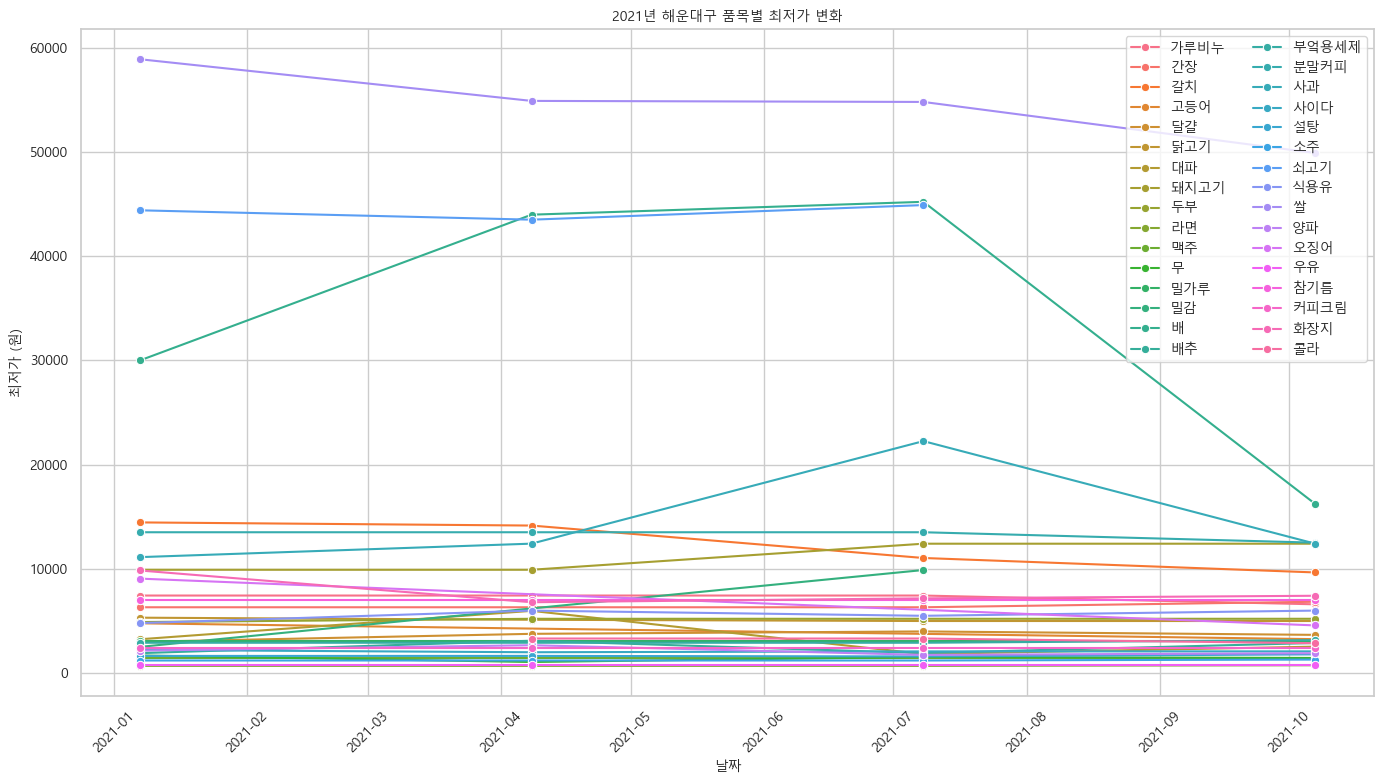

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2021_1q.csv")
q2 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2021_2q.csv")
q3 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2021_3q.csv")
q4 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2021_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2021ÎÖÑ Ìï¥Ïö¥ÎåÄÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2021_min.csv", index=False, encoding="utf-8-sig")

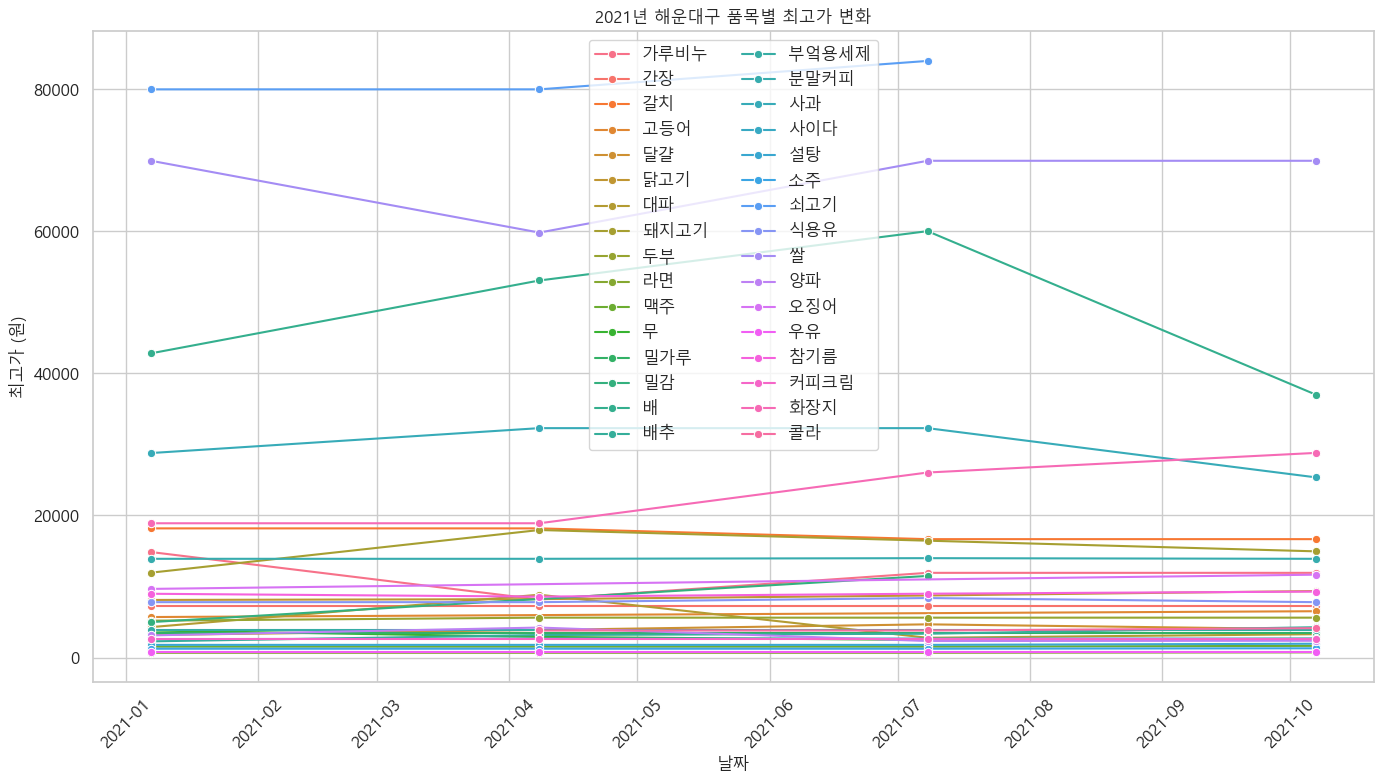

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2021_1q.csv")
q2 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2021_2q.csv")
q3 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2021_3q.csv")
q4 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2021_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2021ÎÖÑ Ìï¥Ïö¥ÎåÄÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2021_max.csv", index=False, encoding="utf-8-sig")